# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize # ini salah harusnya pake minmaxscaler, next ngolahin data pake minmaxscaler ya
from sklearn.preprocessing import MinMaxScaler # ini rumus normalize
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data = pd.read_csv(r"data_source\bank_transactions_data_2.csv", delimiter=",")
data

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

##### **1. Memahami Struktur Data**

In [3]:
data

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [7]:
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [8]:
display(data.TransactionType.value_counts())
display(data.LoginAttempts.value_counts())
display(data.Location.value_counts())

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

LoginAttempts
1    2390
5      32
4      32
3      31
2      27
Name: count, dtype: int64

Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami               64
Detroit             63
Houston             63
Memphis             63
Denver              62
Kansas City         61
Boston              61
Mesa                61
Atlanta             61
Seattle             61
Colorado Springs    60
Jacksonville        60
Fresno              60
Chicago             60
Austin              59
San Jose            59
Raleigh             59
San Antonio         59
San Diego           59
Indianapolis        58
New York            58
San Francisco       57
Nashville           55
Milwaukee           55
Las Vegas           55
Virginia Beach      55
Phoenix             55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dallas              49
Washington          48
El Paso             46
Portland            42
Albuquerque         41
Na

array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>],
       [<Axes: title={'center': 'AccountBalance'}>, <Axes: >]],
      dtype=object)

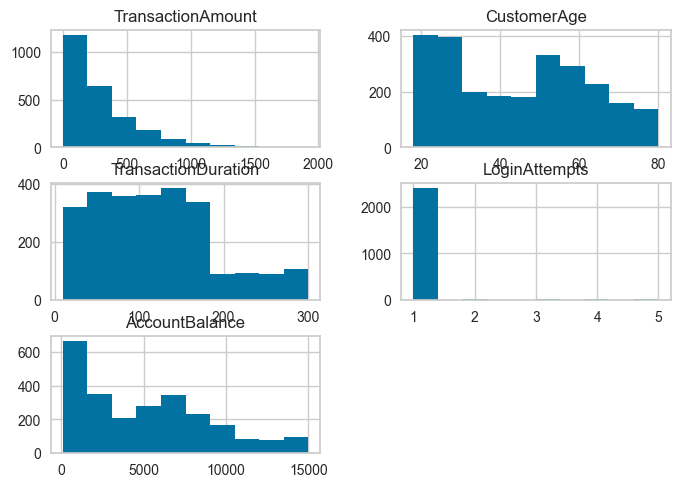

In [9]:
data.hist()

In [4]:
fitur_kategorikal = data.select_dtypes(include=['object']).columns
display(fitur_kategorikal)
display(data[fitur_kategorikal])
fitur_numerikal = data.select_dtypes(include=['number']).columns
display(fitur_numerikal)
display(data[fitur_numerikal])

Index(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType',
       'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
       'CustomerOccupation', 'PreviousTransactionDate'],
      dtype='object')

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
0,TX000001,AC00128,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,2024-11-04 08:08:08
1,TX000002,AC00455,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,2024-11-04 08:09:35
2,TX000003,AC00019,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student,2024-11-04 08:07:04
3,TX000004,AC00070,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student,2024-11-04 08:09:06
4,TX000005,AC00411,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,Doctor,2024-11-04 08:11:29
2508,TX002509,AC00322,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,Doctor,2024-11-04 08:11:42
2509,TX002510,AC00095,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,Retired,2024-11-04 08:08:39
2510,TX002511,AC00118,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,Student,2024-11-04 08:12:22


Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40
...,...,...,...,...,...
2507,856.21,33,109,1,12690.79
2508,251.54,48,177,1,254.75
2509,28.63,56,146,1,3382.91
2510,185.97,23,19,1,1776.91


##### **2. Menangani Data Kosong**

In [11]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
 
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)
display(missing_percentage)
display(missing_data)
if(missing_data['Missing Values'].all() > 0):
    missing_data[missing_data['Missing Values'] > 0]
    print("There is missing values in the dataset")
else:
    print("No missing values in the dataset")

TransactionID              0.0
AccountID                  0.0
TransactionAmount          0.0
TransactionDate            0.0
TransactionType            0.0
Location                   0.0
DeviceID                   0.0
IP Address                 0.0
MerchantID                 0.0
Channel                    0.0
CustomerAge                0.0
CustomerOccupation         0.0
TransactionDuration        0.0
LoginAttempts              0.0
AccountBalance             0.0
PreviousTransactionDate    0.0
dtype: float64

,Missing Values,Percentage
TransactionID,0,0.0
AccountID,0,0.0
TransactionAmount,0,0.0
TransactionDate,0,0.0
TransactionType,0,0.0
Location,0,0.0
DeviceID,0,0.0
IP Address,0,0.0
MerchantID,0,0.0
Channel,0,0.0


No missing values in the dataset


##### **3. Analisis Distribusi dan Korelasi**

In [12]:
number_login = data.groupby(by=["LoginAttempts"]).agg({"LoginAttempts":"count"}).rename(columns={'LoginAttempts': 'banyaknya_login'}).reset_index()
number_login

,LoginAttempts,banyaknya_login
0,1,2390
1,2,27
2,3,31
3,4,32
4,5,32


In [13]:
number_location = data.groupby(by=["Location"]).agg({"Location":"count"}).rename(columns={'Location': 'banyaknya_lokasi'}).reset_index()
number_location

,Location,banyaknya_lokasi
0,Albuquerque,41
1,Atlanta,61
2,Austin,59
3,Baltimore,51
4,Boston,61
5,Charlotte,68
6,Chicago,60
7,Colorado Springs,60
8,Columbus,54
9,Dallas,49


In [14]:
data_corr = data[fitur_numerikal].corr()
data_corr

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


##### **4. Visualisasi Data**

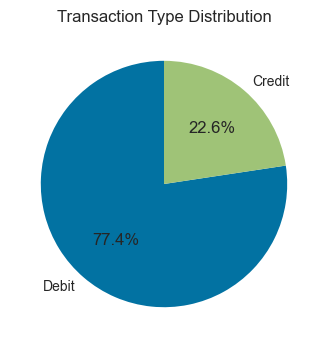

In [15]:
plt.figure(figsize=(4, 4))
plt.pie(data.TransactionType.value_counts(), labels=['Debit','Credit'], autopct='%1.1f%%', startangle=90)
plt.title('Transaction Type Distribution')
plt.show()

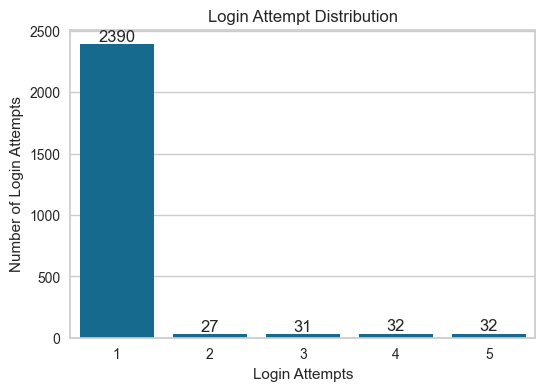

In [16]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x="LoginAttempts", 
    y="banyaknya_login", 
    data=number_login.sort_values(by="banyaknya_login", ascending=True))
plt.title("Login Attempt Distribution")
plt.xlabel("Login Attempts")
plt.ylabel("Number of Login Attempts")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

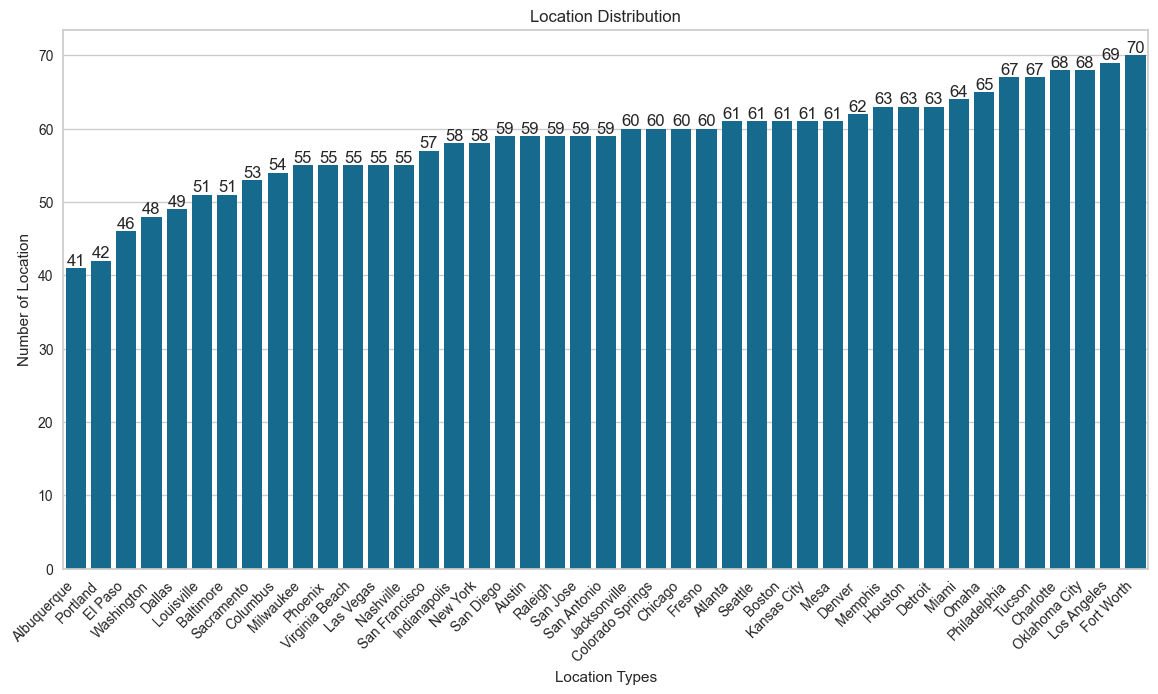

In [17]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x="Location", 
    y="banyaknya_lokasi", 
    data=number_location.sort_values(by="banyaknya_lokasi",ascending=True))
plt.title("Location Distribution")
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel("Location Types")
plt.ylabel("Number of Location")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

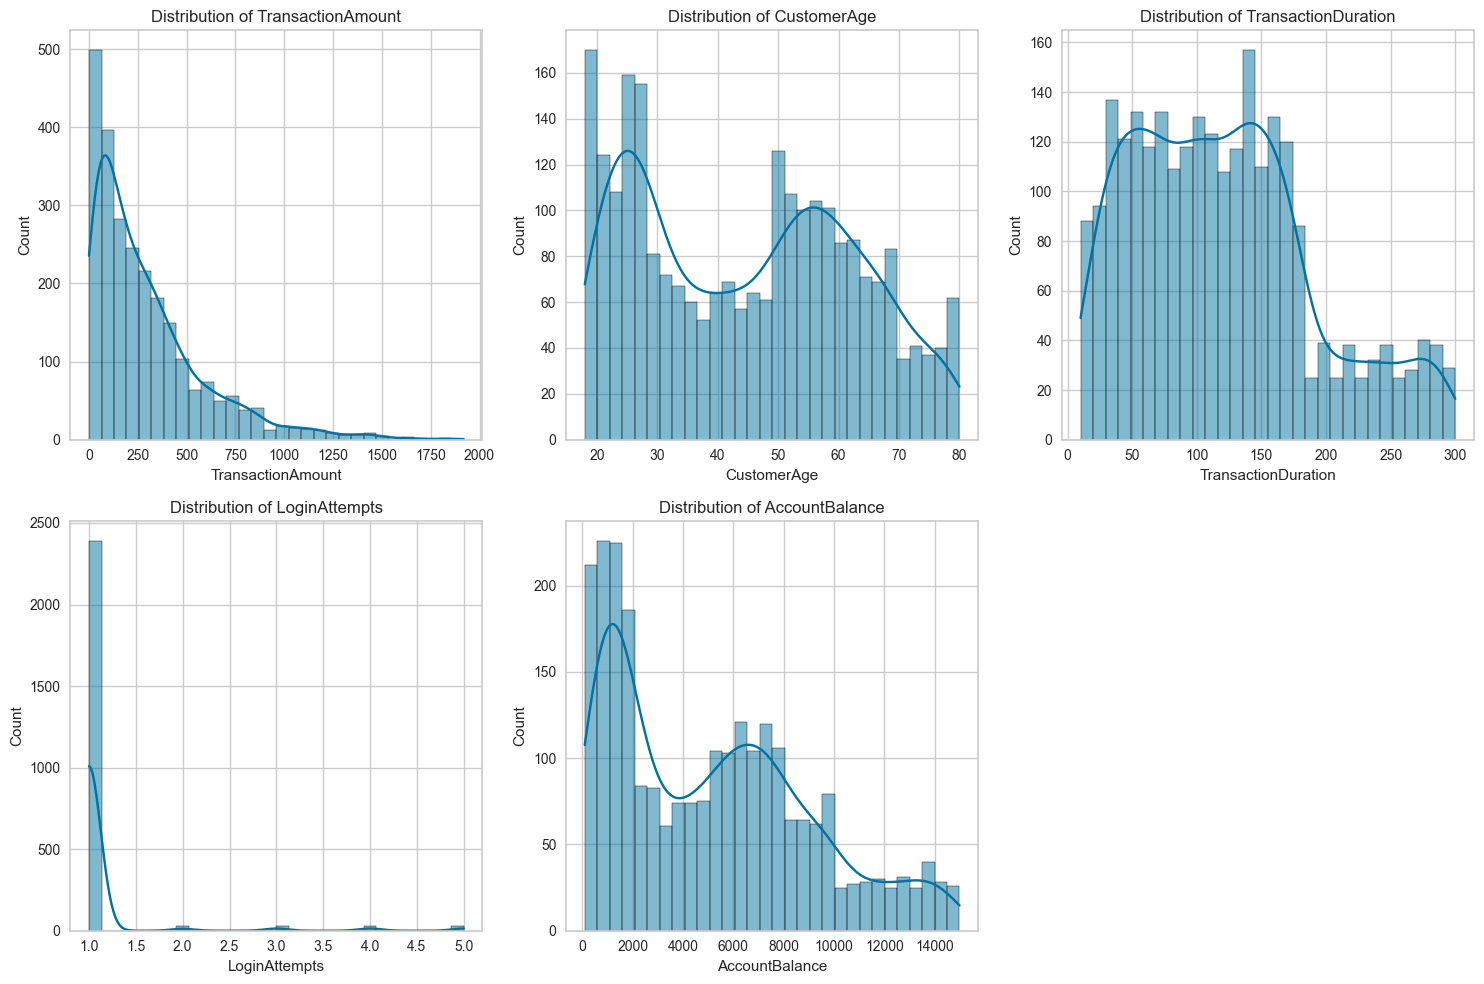

In [18]:
# "TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"
# attributes = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
 
plt.figure(figsize=(15, 10))
for i, column in enumerate(fitur_numerikal, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

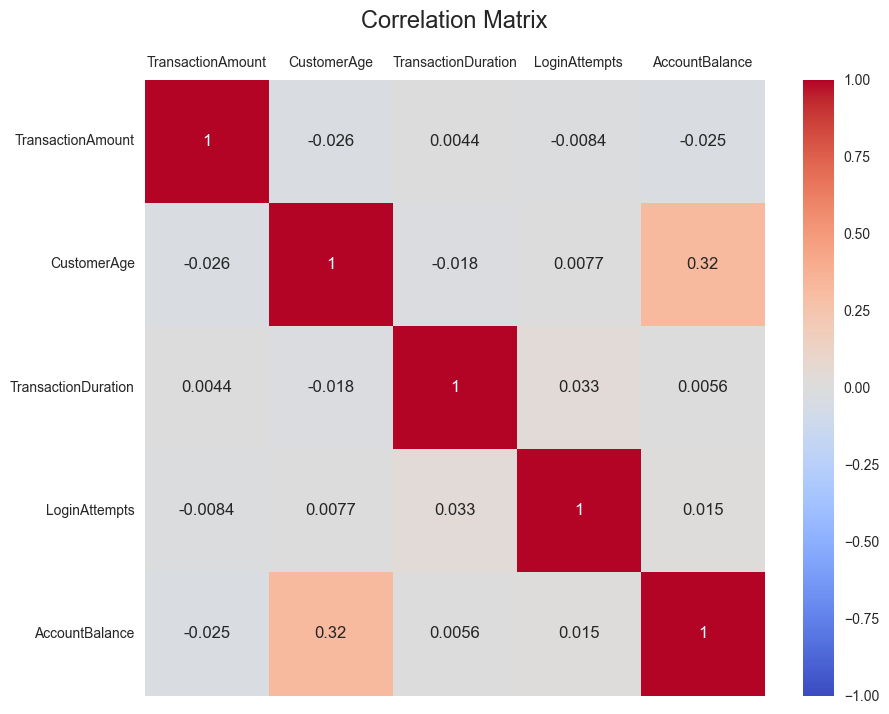

In [19]:
plt.figure(figsize=(10, 8))
cm = data_corr
 
sns.heatmap(cm, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=17, pad=20)
plt.yticks(rotation=0, horizontalalignment='right')
# plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

##### 1. Data Splitting

In [5]:
# Data Splitting
# Memilih kolom yang relevan sesuai ketentuannya
# data_kategorikal = pd.DataFrame(data, columns = ("TransactionType", "Location", "Channel"))
data_kategorikal = pd.DataFrame(data[fitur_kategorikal])
# kategorical_features = data.select_dtypes(include=['object']).columns
display(data_kategorikal)
display(data_kategorikal.info())

# Memilih kolom yang relevan sesuai ketentuannya
# data_numerikal = pd.DataFrame(data, columns = ("TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"))
data_numerikal = pd.DataFrame(data[fitur_numerikal])
display(data_numerikal)
display(data_numerikal.info())

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
0,TX000001,AC00128,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,2024-11-04 08:08:08
1,TX000002,AC00455,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,2024-11-04 08:09:35
2,TX000003,AC00019,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student,2024-11-04 08:07:04
3,TX000004,AC00070,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student,2024-11-04 08:09:06
4,TX000005,AC00411,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,Doctor,2024-11-04 08:11:29
2508,TX002509,AC00322,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,Doctor,2024-11-04 08:11:42
2509,TX002510,AC00095,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,Retired,2024-11-04 08:08:39
2510,TX002511,AC00118,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,Student,2024-11-04 08:12:22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TransactionID            2512 non-null   object
 1   AccountID                2512 non-null   object
 2   TransactionDate          2512 non-null   object
 3   TransactionType          2512 non-null   object
 4   Location                 2512 non-null   object
 5   DeviceID                 2512 non-null   object
 6   IP Address               2512 non-null   object
 7   MerchantID               2512 non-null   object
 8   Channel                  2512 non-null   object
 9   CustomerOccupation       2512 non-null   object
 10  PreviousTransactionDate  2512 non-null   object
dtypes: object(11)
memory usage: 216.0+ KB


None

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40
...,...,...,...,...,...
2507,856.21,33,109,1,12690.79
2508,251.54,48,177,1,254.75
2509,28.63,56,146,1,3382.91
2510,185.97,23,19,1,1776.91


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   CustomerAge          2512 non-null   int64  
 2   TransactionDuration  2512 non-null   int64  
 3   LoginAttempts        2512 non-null   int64  
 4   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 98.3 KB


None

##### 2. Menghapus atau Menangani Data Kosong (Missing Values)

In [21]:
display(data_kategorikal.isnull().sum())
display(data_kategorikal.isna().sum())
display(data_numerikal.isnull().sum())
display(data_numerikal.isna().sum())

TransactionID              0
AccountID                  0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerOccupation         0
PreviousTransactionDate    0
dtype: int64

TransactionID              0
AccountID                  0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerOccupation         0
PreviousTransactionDate    0
dtype: int64

TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

In [22]:
def detect_missvalue(data):
    missing_values = data.isna().sum()
    missing_percentage = (missing_values / len(data)) * 100
    
    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    }).sort_values(by='Missing Values', ascending=False)
    display(missing_percentage)
    display(missing_data)
    if(missing_data['Missing Values'].all() > 0):
        missing_data[missing_data['Missing Values'] > 0]
        print("There is missing values in the datast\n")
    else:
        print("No missing values in the dataset\n")

print("Scanning data_kategorikal:")
detect_missvalue(data_kategorikal)        
print("Scanning data_numerikal:")        
detect_missvalue(data_numerikal)

Scanning data_kategorikal:


TransactionID              0.0
AccountID                  0.0
TransactionDate            0.0
TransactionType            0.0
Location                   0.0
DeviceID                   0.0
IP Address                 0.0
MerchantID                 0.0
Channel                    0.0
CustomerOccupation         0.0
PreviousTransactionDate    0.0
dtype: float64

,Missing Values,Percentage
TransactionID,0,0.0
AccountID,0,0.0
TransactionDate,0,0.0
TransactionType,0,0.0
Location,0,0.0
DeviceID,0,0.0
IP Address,0,0.0
MerchantID,0,0.0
Channel,0,0.0
CustomerOccupation,0,0.0


No missing values in the dataset

Scanning data_numerikal:


TransactionAmount      0.0
CustomerAge            0.0
TransactionDuration    0.0
LoginAttempts          0.0
AccountBalance         0.0
dtype: float64

,Missing Values,Percentage
TransactionAmount,0,0.0
CustomerAge,0,0.0
TransactionDuration,0,0.0
LoginAttempts,0,0.0
AccountBalance,0,0.0


No missing values in the dataset



##### 3. Mendeteksi dan menghapus data duplikasi

In [23]:
duplicates = data.duplicated()
print("Baris duplikat:")
print(data[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []


##### 4. Deteksi dan Penanganan Outlier 
Namun, ini tidak dipakai untuk tahap analisis pada dataset fraud detection karena dataset fraud detection bisa jadi memberi informasi penting maka kita tidak akan menangani data secara matematis

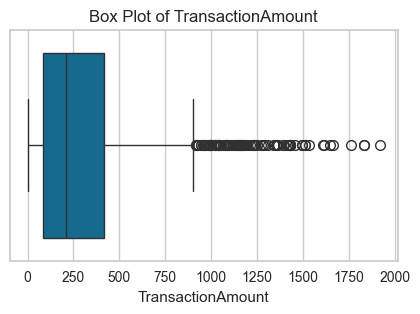

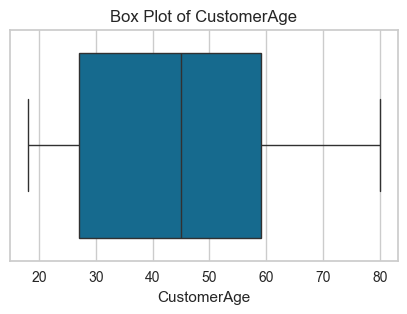

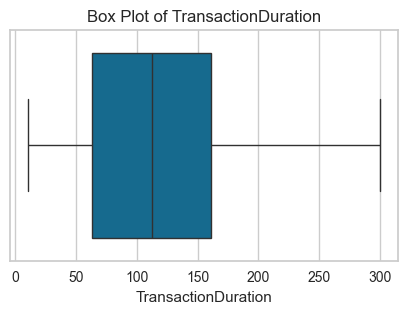

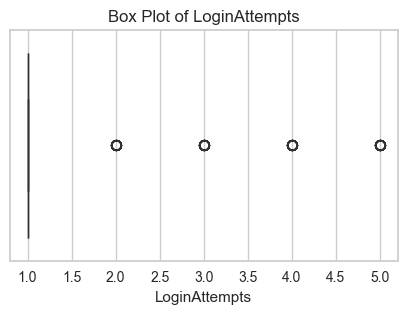

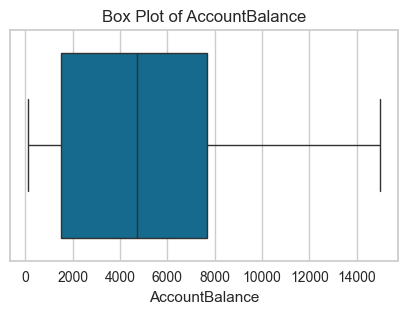

In [ ]:
# Mendeteksi Outlier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in data_numerikal:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data_numerikal[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
# Menghapus outlier
Q1 = data[fitur_numerikal].quantile(0.25)
Q3 = data[fitur_numerikal].quantile(0.75)
IQR = Q3 - Q1
batas_bawah, batas_atas = (Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
# condition = ~((data[fitur_numerikal] < (batas_bawah)) | (data[fitur_numerikal] > (batas_atas))).any(axis=1)
condition = ~((data[fitur_numerikal] < (Q1 - 1.5 * IQR)) | (data[fitur_numerikal] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = data.loc[condition, fitur_numerikal]
df_filtered_kategori = data.loc[condition, fitur_kategorikal]
 
# Menggabungkan kembali dengan kolom kategorikal
data_baru = pd.concat([df_filtered_numeric, df_filtered_kategori], axis=1)

In [ ]:
# Menangani Outlier

def median_outlier(data, batas_bawah, batas_atas):
    median = data.median()
    data = data.apply(lambda x: median if (x < batas_bawah) | (x > batas_atas) else x)
    return data

def near_outlier(data, batas_bawah, batas_atas):
    data = data.apply(lambda x: (Q1 - 1.5 * IQR) if x < batas_bawah else batas_atas if x > batas_bawah else x)
    return data

def delete_outlier(data, batas_bawah, batas_atas):
    condition = ~((data < (batas_bawah)) | (data > (batas_atas))).any(axis=1)
    return condition

def handleOutlier(data, feature):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah, batas_atas = (Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)
    
    display(data, feature)
    # replace outlier wiith median
    data = median_outlier(data, batas_bawah, batas_atas)

    # replace outlier with near bound
    # data = near_outlier(data, batas_bawah, batas_atas)
    return data

dataCopy = data_numerikal.copy()
for feature in fitur_numerikal:
    dataCopy[feature] = handleOutlier(dataCopy[feature], feature)

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0       70
1       68
2       19
3       26
4       26
        ..
2507    33
2508    48
2509    56
2510    23
2511    24
Name: CustomerAge, Length: 2512, dtype: int64

'CustomerAge'

0        81
1       141
2        56
3        25
4       198
       ... 
2507    109
2508    177
2509    146
2510     19
2511     93
Name: TransactionDuration, Length: 2512, dtype: int64

'TransactionDuration'

0       1
1       1
2       1
3       1
4       1
       ..
2507    1
2508    1
2509    1
2510    1
2511    1
Name: LoginAttempts, Length: 2512, dtype: int64

'LoginAttempts'

0        5112.21
1       13758.91
2        1122.35
3        8569.06
4        7429.40
          ...   
2507    12690.79
2508      254.75
2509     3382.91
2510     1776.91
2511      131.25
Name: AccountBalance, Length: 2512, dtype: float64

'AccountBalance'

In [ ]:
# menampung penggabungan antara hasil data penanganan outlier dgn data kategorikal
# ke data baru supaya lebih refresh
data_test = pd.concat([dataCopy, data_kategorikal], axis=1)
display(data_test)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
0,14.09,70,81,1.0,5112.21,TX000001,AC00128,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,2024-11-04 08:08:08
1,376.24,68,141,1.0,13758.91,TX000002,AC00455,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,2024-11-04 08:09:35
2,126.29,19,56,1.0,1122.35,TX000003,AC00019,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student,2024-11-04 08:07:04
3,184.50,26,25,1.0,8569.06,TX000004,AC00070,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student,2024-11-04 08:09:06
4,13.45,26,198,1.0,7429.40,TX000005,AC00411,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,33,109,1.0,12690.79,TX002508,AC00297,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,Doctor,2024-11-04 08:11:29
2508,251.54,48,177,1.0,254.75,TX002509,AC00322,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,Doctor,2024-11-04 08:11:42
2509,28.63,56,146,1.0,3382.91,TX002510,AC00095,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,Retired,2024-11-04 08:08:39
2510,185.97,23,19,1.0,1776.91,TX002511,AC00118,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,Student,2024-11-04 08:12:22


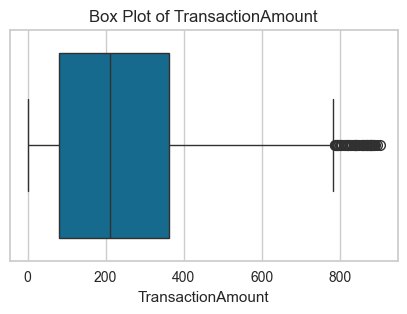

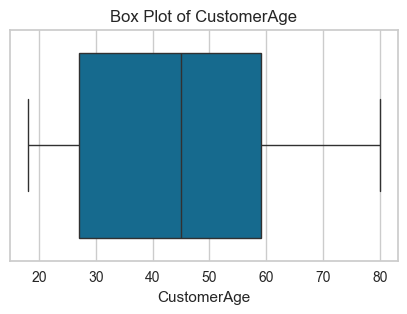

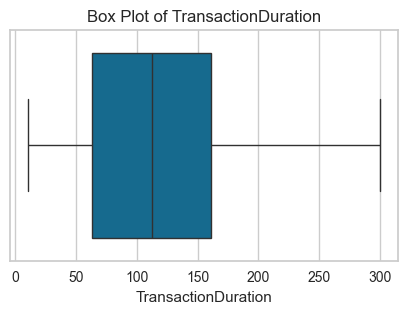

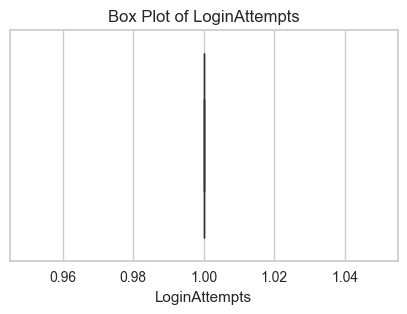

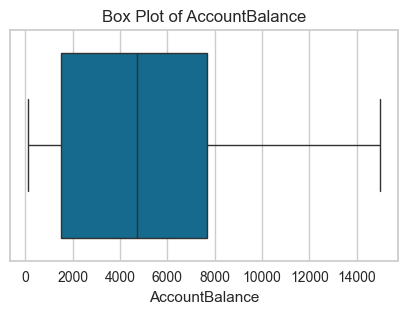

In [ ]:
for feature in fitur_numerikal:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data_test[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
a = handleOutlier(data_test["TransactionAmount"], "TransactionAmount")

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

In [ ]:
for _ in range(12):
    a = handleOutlier(data_test["TransactionAmount"], "TransactionAmount")
    if a.shape[0] == data_test.shape[0]:
        break
    data_test["TransactionAmount"] = a["TransactionAmount"]

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

In [ ]:
a = handleOutlier(data_test["TransactionAmount"], "TransactionAmount")
b = handleOutlier(a, "TransactionAmount")
c = handleOutlier(b, "TransactionAmount")
d = handleOutlier(c, "TransactionAmount")
e = handleOutlier(d, "TransactionAmount")
f = handleOutlier(e, "TransactionAmount")
g = handleOutlier(f, "TransactionAmount")
h = handleOutlier(g, "TransactionAmount")
i = handleOutlier(h, "TransactionAmount")
j = handleOutlier(i, "TransactionAmount")
k = handleOutlier(j, "TransactionAmount")
l = handleOutlier(k, "TransactionAmount")
data_test["TransactionAmount"] = l

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    856.21
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

0        14.09
1       376.24
2       126.29
3       184.50
4        13.45
         ...  
2507    211.12
2508    251.54
2509     28.63
2510    185.97
2511    243.08
Name: TransactionAmount, Length: 2512, dtype: float64

'TransactionAmount'

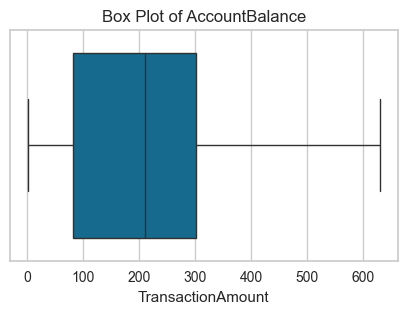

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=data_test["TransactionAmount"])
plt.title(f'Box Plot of {feature}')
plt.show()

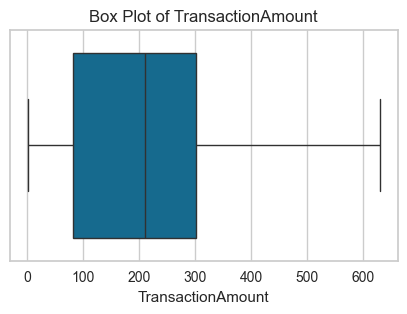

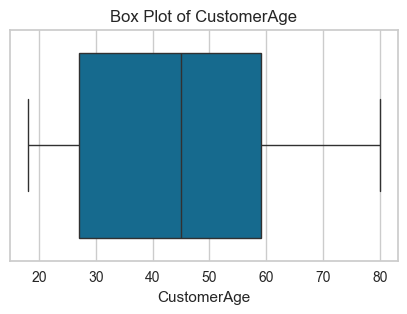

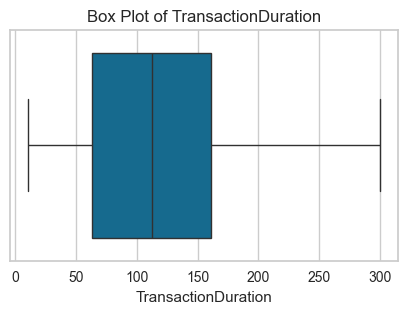

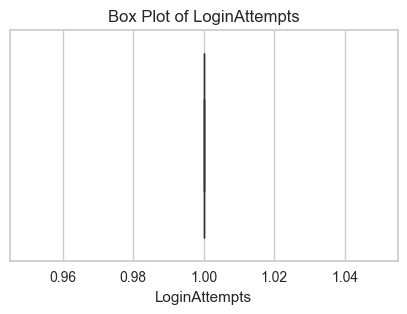

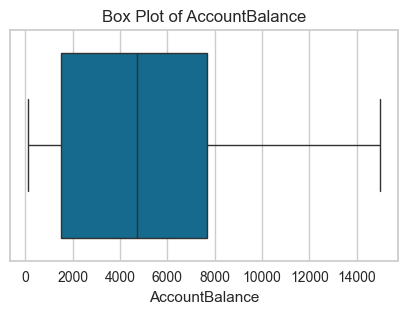

In [ ]:
for feature in fitur_numerikal:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data_test[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

##### 5. Feature Selecting
Memilih kolom untuk melatih model

In [59]:
data_numerikal

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40
...,...,...,...,...,...
2507,856.21,33,109,1,12690.79
2508,251.54,48,177,1,254.75
2509,28.63,56,146,1,3382.91
2510,185.97,23,19,1,1776.91


In [6]:
# agar lebih refresh saat masuk tahap analisis/pembangunan model
# dataC = pd.DataFrame(data_encoder, columns=("JenisTransaksi", "Lokasi", "Jalur","JumlahTransaksi","Umur","DurasiTransaksi","PercobaanMasuk","SaldoAkun"))
# dataC = data_encoder[["JumlahTransaksi","Umur","DurasiTransaksi","PercobaanMasuk","SaldoAkun","JenisTransaksi", "Lokasi", "Jalur"]]
# features = ["TransactionAmount","AccountBalance"]

data_selected = data[fitur_numerikal]
display(data_selected)
display(data_selected[["TransactionAmount","AccountBalance"]])
display(data_selected.info())

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40
...,...,...,...,...,...
2507,856.21,33,109,1,12690.79
2508,251.54,48,177,1,254.75
2509,28.63,56,146,1,3382.91
2510,185.97,23,19,1,1776.91


,TransactionAmount,AccountBalance
0,14.09,5112.21
1,376.24,13758.91
2,126.29,1122.35
3,184.50,8569.06
4,13.45,7429.40
...,...,...
2507,856.21,12690.79
2508,251.54,254.75
2509,28.63,3382.91
2510,185.97,1776.91


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   CustomerAge          2512 non-null   int64  
 2   TransactionDuration  2512 non-null   int64  
 3   LoginAttempts        2512 non-null   int64  
 4   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 98.3 KB


None

##### 5. Normalisasi atau Standarisasi Fitur

In [33]:
# ada beberapa missing values setelah menghapus outlier di tahap sebelumnya, ini penting buat manipulasi pakai standar atau normalization
display(data[fitur_numerikal].isna().sum())
display(data[fitur_numerikal].isnull().sum())
# findMedian = data_baru[fitur_numerikal].median()
# display(findMedian)
# data_baru[fitur_numerikal] = data_baru[fitur_numerikal].fillna(findMedian)
# data_baru[fitur_numerikal]

TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

In [7]:
# normalization = MinMaxScaler()
scaler = StandardScaler()
# data_normal = normalize(data_baru[fitur_numerikal])
# data_normalize = normalization.fit_transform(data_baru[fitur_numerikal])
data_scaler = scaler.fit_transform(data_selected)
# display(data_normal)
# display(data_normalize)
display(data_scaler)
data[fitur_numerikal]=data_scaler

array([[-9.71275470e-01,  1.42371826e+00, -5.52443263e-01,
        -2.06793649e-01, -5.36635052e-04],
       [ 2.69439606e-01,  1.31128706e+00,  3.05314366e-01,
        -2.06793649e-01,  2.21647159e+00],
       [-5.86881623e-01, -1.44327736e+00, -9.09842275e-01,
        -2.06793649e-01, -1.02353413e+00],
       ...,
       [-9.21461864e-01,  6.36699859e-01,  3.76794169e-01,
        -2.06793649e-01, -4.43928023e-01],
       [-3.82419727e-01, -1.21841495e+00, -1.43879281e+00,
        -2.06793649e-01, -8.55705373e-01],
       [-1.86762574e-01, -1.16219935e+00, -3.80891737e-01,
        -2.06793649e-01, -1.27765152e+00]])

In [8]:
data[fitur_numerikal]

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537
1,0.269440,1.311287,0.305314,-0.206794,2.216472
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589
...,...,...,...,...,...
2507,1.913802,-0.656259,-0.152156,-0.206794,1.942606
2508,-0.157779,0.186975,0.819969,-0.206794,-1.245986
2509,-0.921462,0.636700,0.376794,-0.206794,-0.443928
2510,-0.382420,-1.218415,-1.438793,-0.206794,-0.855705


Text(0.5, 1.0, 'Histogram Sebelum Standard')

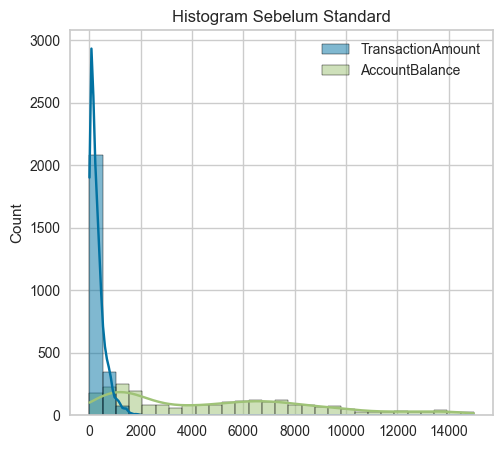

In [31]:
# Histogram Sebelum Normalisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_selected[["TransactionAmount","AccountBalance"]], kde=True)
plt.title("Histogram Sebelum Standard")

Text(0.5, 1.0, 'Histogram Setelah Standarisasi')

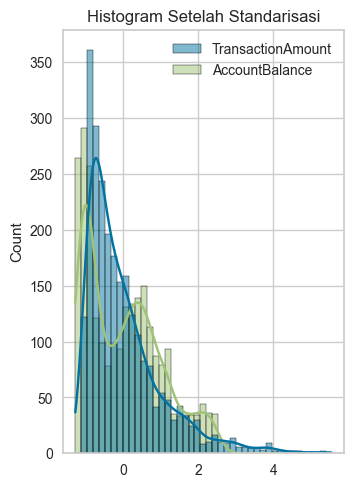

In [ ]:

plt.subplot(1, 2, 2)
sns.histplot(data[["TransactionAmount","AccountBalance"]], kde=True)
plt.title("Histogram Setelah Standarisasi")

##### 6. Encoding Data Kategorikal

In [9]:
data[fitur_kategorikal]

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
0,TX000001,AC00128,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor,2024-11-04 08:08:08
1,TX000002,AC00455,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor,2024-11-04 08:09:35
2,TX000003,AC00019,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student,2024-11-04 08:07:04
3,TX000004,AC00070,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student,2024-11-04 08:09:06
4,TX000005,AC00411,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,Doctor,2024-11-04 08:11:29
2508,TX002509,AC00322,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,Doctor,2024-11-04 08:11:42
2509,TX002510,AC00095,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,Retired,2024-11-04 08:08:39
2510,TX002511,AC00118,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,Student,2024-11-04 08:12:22


In [8]:
# memilih kolom untuk tahap analisis berikutnya
# category_features = ["TransactionType","Location","Channel"]

# menampung ke objek baru juga supaya tidak senggol/tabrak ke data lama
# data[category_features] = data[category_features].copy()

label_encoder = LabelEncoder()

for feature in fitur_kategorikal:
    data[feature] = label_encoder.fit_transform(data[feature])
data[fitur_kategorikal]

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
0,0,126,684,1,36,365,186,14,0,0,105
1,1,450,1192,1,15,50,82,51,0,0,192
2,2,18,1276,1,23,229,343,8,2,3,41
3,3,68,823,1,33,182,300,1,2,3,163
4,4,406,1959,0,1,298,501,90,2,3,16
...,...,...,...,...,...,...,...,...,...,...,...
2507,2507,293,772,0,7,605,325,71,1,0,305
2508,2508,318,568,1,40,395,448,28,1,0,318
2509,2509,93,1547,1,36,93,474,86,1,2,136
2510,2510,116,379,1,10,614,326,40,2,3,358


##### 7. Renaming Columns
Kolom yang direname ga digunakan di tahap berikutnya karena mau generate file baru

In [ ]:
features = ["TransactionAmount","AccountBalance"]
data_baru = pd.concat([data[category_features],data[features]], axis=1)
data_baru

,TransactionType,Location,Channel,TransactionAmount,AccountBalance
0,1,36,0,-0.971275,-0.000537
1,1,15,0,0.269440,2.216472
2,1,23,2,-0.586882,-1.023534
3,1,33,2,-0.387456,0.885797
4,0,1,2,-0.973468,0.593589
...,...,...,...,...,...
2507,0,7,1,1.913802,1.942606
2508,1,40,1,-0.157779,-1.245986
2509,1,36,1,-0.921462,-0.443928
2510,1,10,2,-0.382420,-0.855705


In [41]:
# Mengubah nama kolom agar mudah analisis
# data_kategorikal.rename(columns={"TransactionType":"JenisTransaksi", "Location":"Lokasi", "Channel":"Jalur"},inplace=True)
# data_numerikal.rename(columns={"TransactionAmount":"JumlahTransaksi", "CustomerAge":"Umur","TransactionDuration":"DurasiTransaksi","LoginAttempts":"PercobaanMasuk","AccountBalance":"SaldoAkun"}, inplace=True)
# data_baru.rename(columns={"TransactionType":"JenisTransaksi", "Location":"Lokasi", "Channel":"Jalur", "TransactionAmount":"JumlahTransaksi", "CustomerAge":"Umur","TransactionDuration":"DurasiTransaksi","LoginAttempts":"PercobaanMasuk","AccountBalance":"SaldoAkun"}, inplace=True)
data_baru.rename(columns={"TransactionType":"JenisTransaksi", "Location":"Lokasi", "Channel":"Jalur", "TransactionAmount":"JumlahTransaksi","AccountBalance":"SaldoAkun"}, inplace=True)
data_baru

,JenisTransaksi,Lokasi,Jalur,JumlahTransaksi,SaldoAkun
0,1,36,0,-0.971275,-0.000537
1,1,15,0,0.269440,2.216472
2,1,23,2,-0.586882,-1.023534
3,1,33,2,-0.387456,0.885797
4,0,1,2,-0.973468,0.593589
...,...,...,...,...,...
2507,0,7,1,1.913802,1.942606
2508,1,40,1,-0.157779,-1.245986
2509,1,36,1,-0.921462,-0.443928
2510,1,10,2,-0.382420,-0.855705


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   int32  
 1   AccountID                2512 non-null   int32  
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   int32  
 4   TransactionType          2512 non-null   int32  
 5   Location                 2512 non-null   int32  
 6   DeviceID                 2512 non-null   int32  
 7   IP Address               2512 non-null   int32  
 8   MerchantID               2512 non-null   int32  
 9   Channel                  2512 non-null   int32  
 10  CustomerAge              2512 non-null   float64
 11  CustomerOccupation       2512 non-null   int32  
 12  TransactionDuration      2512 non-null   float64
 13  LoginAttempts            2512 non-null   float64
 14  AccountBalance          

In [12]:
data.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

In [9]:
features = ["TransactionAmount","AccountBalance"]
X = data[features].values
print(X)

[[-9.71275470e-01 -5.36635052e-04]
 [ 2.69439606e-01  2.21647159e+00]
 [-5.86881623e-01 -1.02353413e+00]
 ...
 [-9.21461864e-01 -4.43928023e-01]
 [-3.82419727e-01 -8.55705373e-01]
 [-1.86762574e-01 -1.27765152e+00]]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [16]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
# dapat jumlah cluster dari hasil elbow method yang ada di paling bawah
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

##### 1. Elbow Method untuk menentukan jumlah cluster

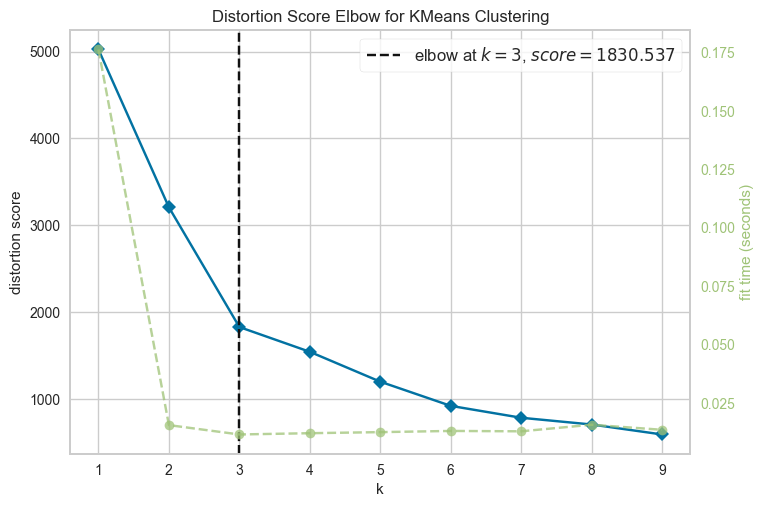

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [17]:
# kmeans = KMeans(n_clusters=3, random_state=42)
print(f"Silhouette Score: {silhouette_score(X, kmeans.fit_predict(X)):1f}")

Silhouette Score: 0.443521


## **c. Feature Selection (Opsional)**

In [13]:
features2 = ["LoginAttempts","AccountBalance"]
X2 = data[features2].values
print(X2)

[[-2.06793649e-01 -5.36635052e-04]
 [-2.06793649e-01  2.21647159e+00]
 [-2.06793649e-01 -1.02353413e+00]
 ...
 [-2.06793649e-01 -4.43928023e-01]
 [-2.06793649e-01 -8.55705373e-01]
 [-2.06793649e-01 -1.27765152e+00]]


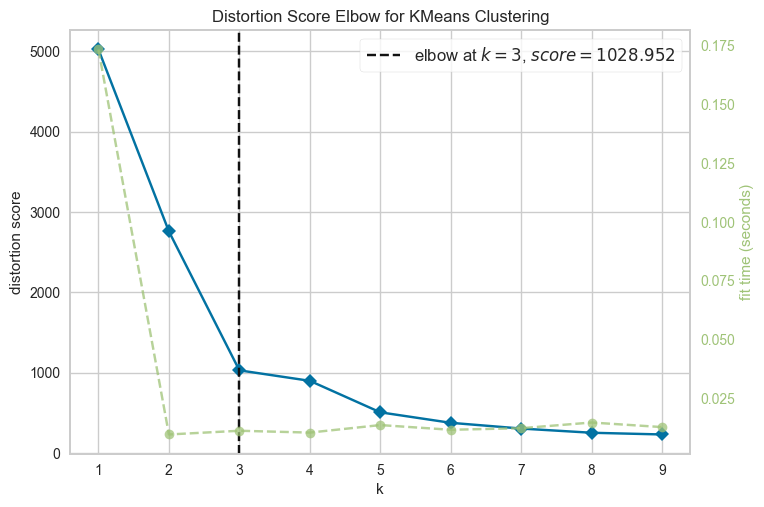

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X2)
visualizer.show()

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
display(kmeans.fit(X2))
print(f"Silhouette Score: {silhouette_score(X2, kmeans.fit_predict(X2)):1f}")

KMeans(n_clusters=3, random_state=42)

Silhouette Score: 0.616455


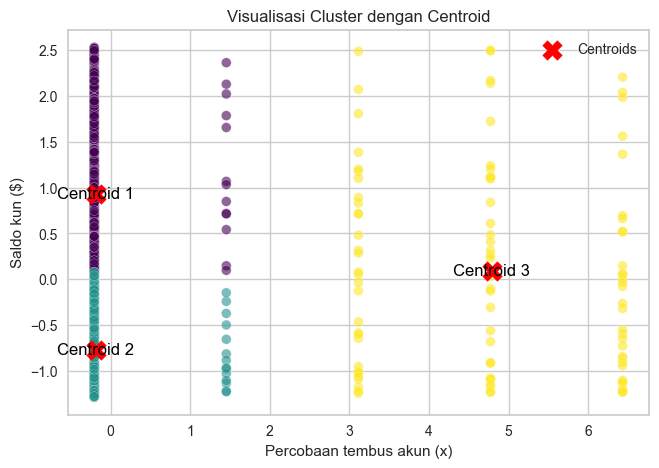

Nilai Centroids:
Centroid 1: Percobaan tembus akun = -0.19, Saldo akun = 0.93
Centroid 2: Percobaan tembus akun = -0.19, Saldo akun = -0.77
Centroid 3: Percobaan tembus akun = 4.79, Saldo akun = 0.09


In [18]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_ 

plt.figure(figsize=(7.5, 5))

plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=200, marker='X', label='Centroids')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='black', fontsize=12, ha='center', va='center')
 
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Percobaan tembus akun (x)')
plt.ylabel('Saldo kun ($)')
plt.legend()
plt.show()

print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Percobaan tembus akun = {centroid[0]:.2f}, Saldo akun = {centroid[1]:.2f}")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

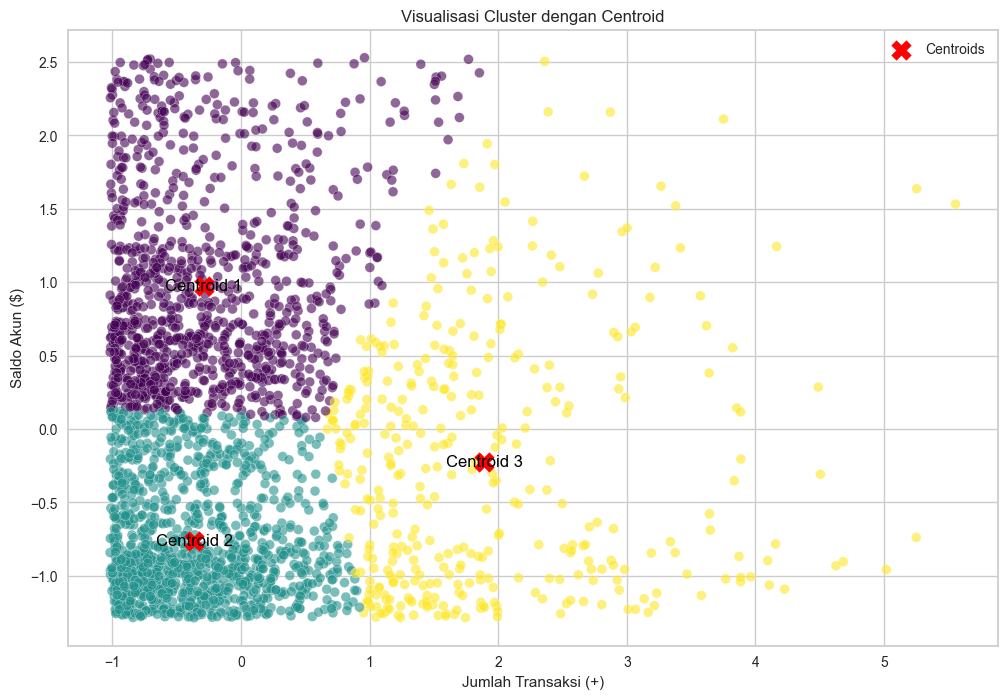

Nilai Centroids:
Centroid 1: Jumlah Transaksi = -0.29, Saldo Akun = 0.98
Centroid 2: Jumlah Transaksi = -0.36, Saldo Akun = -0.76
Centroid 3: Jumlah Transaksi = 1.89, Saldo Akun = -0.23


In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_ 

plt.figure(figsize=(7.5, 5))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=200, marker='X', label='Centroids')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='black', fontsize=12, ha='center', va='center')
 
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Jumlah Transaksi (+)')
plt.ylabel('Saldo Akun ($)')
plt.legend()
plt.show()

print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Jumlah Transaksi = {centroid[0]:.2f}, Saldo Akun = {centroid[1]:.2f}")

### ini hasil udah bagus tapi pas merapihkan coding tetiba beda, padahal udah liat struktur codingan yg bener

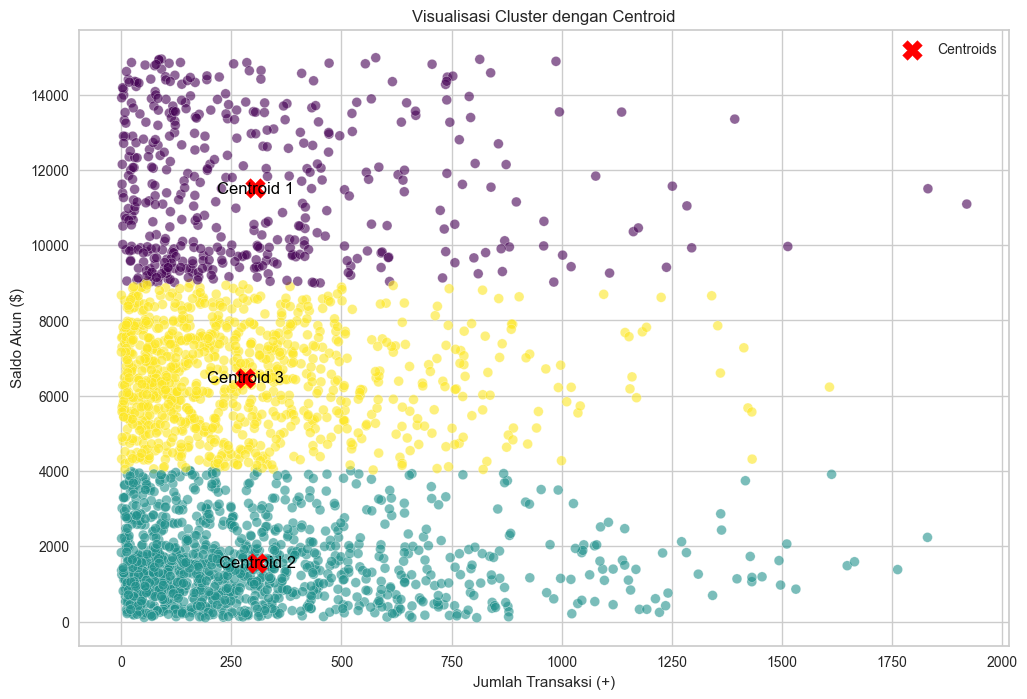

Nilai Centroids:
Centroid 1: Jumlah Transaksi = 304.11, Saldo Akun = 11507.92
Centroid 2: Jumlah Transaksi = 308.29, Saldo Akun = 1563.04
Centroid 3: Jumlah Transaksi = 281.47, Saldo Akun = 6471.82


In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_ 

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=200, marker='X', label='Centroids')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='black', fontsize=12, ha='center', va='center')
 
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Jumlah Transaksi (+)')
plt.ylabel('Saldo Akun ($)')
plt.legend()
plt.show()

print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Jumlah Transaksi = {centroid[0]:.2f}, Saldo Akun = {centroid[1]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [19]:
data['Cluster'] = kmeans.labels_
data['Cluster']

0       1
1       0
2       1
3       0
4       0
       ..
2507    2
2508    1
2509    1
2510    1
2511    1
Name: Cluster, Length: 2512, dtype: int32

In [20]:
data

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,0,126,-0.971275,684,1,36,365,186,14,0,1.423718,0,-0.552443,-0.206794,-0.000537,105,1
1,1,450,0.269440,1192,1,15,50,82,51,0,1.311287,0,0.305314,-0.206794,2.216472,192,0
2,2,18,-0.586882,1276,1,23,229,343,8,2,-1.443277,3,-0.909842,-0.206794,-1.023534,41,1
3,3,68,-0.387456,823,1,33,182,300,1,2,-1.049768,3,-1.353017,-0.206794,0.885797,163,0
4,4,406,-0.973468,1959,0,1,298,501,90,2,-1.049768,3,1.120184,-0.206794,0.593589,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,2507,293,1.913802,772,0,7,605,325,71,1,-0.656259,0,-0.152156,-0.206794,1.942606,305,2
2508,2508,318,-0.157779,568,1,40,395,448,28,1,0.186975,0,0.819969,-0.206794,-1.245986,318,1
2509,2509,93,-0.921462,1547,1,36,93,474,86,1,0.636700,2,0.376794,-0.206794,-0.443928,136,1
2510,2510,116,-0.382420,379,1,10,614,326,40,2,-1.218415,3,-1.438793,-0.206794,-0.855705,358,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [21]:
data[fitur_numerikal]=scaler.inverse_transform(data[fitur_numerikal])
data[fitur_numerikal]

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70.0,81.0,1.0,5112.21
1,376.24,68.0,141.0,1.0,13758.91
2,126.29,19.0,56.0,1.0,1122.35
3,184.50,26.0,25.0,1.0,8569.06
4,13.45,26.0,198.0,1.0,7429.40
...,...,...,...,...,...
2507,856.21,33.0,109.0,1.0,12690.79
2508,251.54,48.0,177.0,1.0,254.75
2509,28.63,56.0,146.0,1.0,3382.91
2510,185.97,23.0,19.0,1.0,1776.91


In [22]:
data

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,0,126,14.09,684,1,36,365,186,14,0,70.0,0,81.0,1.0,5112.21,105,1
1,1,450,376.24,1192,1,15,50,82,51,0,68.0,0,141.0,1.0,13758.91,192,0
2,2,18,126.29,1276,1,23,229,343,8,2,19.0,3,56.0,1.0,1122.35,41,1
3,3,68,184.50,823,1,33,182,300,1,2,26.0,3,25.0,1.0,8569.06,163,0
4,4,406,13.45,1959,0,1,298,501,90,2,26.0,3,198.0,1.0,7429.40,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,2507,293,856.21,772,0,7,605,325,71,1,33.0,0,109.0,1.0,12690.79,305,2
2508,2508,318,251.54,568,1,40,395,448,28,1,48.0,0,177.0,1.0,254.75,318,1
2509,2509,93,28.63,1547,1,36,93,474,86,1,56.0,2,146.0,1.0,3382.91,136,1
2510,2510,116,185.97,379,1,10,614,326,40,2,23.0,3,19.0,1.0,1776.91,358,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [23]:
# Mendapatkan label cluster
labels = kmeans.labels_

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(x, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = x[labels == cluster_id]
        mean_jumlah_trans = cluster_data[:,0].mean()
        mean_saldo = cluster_data[:, 1].mean()
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Transaction Amount: {mean_jumlah_trans:.2f}")
        print(f"Rata-rata Saldo Akun: {mean_saldo:.2f}") 

analyze_clusters(X, labels, k=3)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Transaction Amount: -0.29
Rata-rata Saldo Akun: 0.98

Cluster 2:
Rata-rata Transaction Amount: -0.36
Rata-rata Saldo Akun: -0.76

Cluster 3:
Rata-rata Transaction Amount: 1.89
Rata-rata Saldo Akun: -0.23


Tulis hasil interpretasinya di sini.
## 1. Cluster 1:
- **Rata-rata Transaction Amount (+):** -0.29
- **Rata-rata Saldo Akun ($):** 0.98
- **Analisis:** Cluster 1 menunjukkan bahwa rata-rata jumlah transaksi yang dilakukan oleh pelanggan maupun penipuan bertingkat sangat bawah, tetapi rata-rata saldo akun sangat besar, sehingga kemungkinan besar centroid dinyatakan bahwa aman karena biasanya pelanggan membayar barang yang harganya memadai dengan menggunakan kartunya.

## 2. Cluster 2:
- **Rata-rata Transaction Amount (+):** -0.36
- **Rata-rata Saldo Akun ($):** -0.76
- **Analisis:** Cluster 2 menunjukkan bahwa rata-rata jumlah transaksiyang dilakukan tingkat rendah maupun rata-rata saldo akun juga tingkat rendah. Ini dapat ditandai bahwa perlu hati-hati karena masih ada pertimbangan antara pelanggan mungkin membelanjakan hanya beberapa kali pada harga barang yang melebihi harga normal, dan penjahat melakukan pencurian saldo akun pemilik sebanyaknya tetapi transaksinya dilakukan hanya beberapa kali.

## 3. Cluster 3:
- **Rata-rata Transaction Amount (+):** 1.89
- **Rata-rata Saldo Akun ($):** -0.23
- **Analisis:** Cluster 3 menunjukkan bahwa rata-rata jumlah transaksi yang dilakukan oleh penipuan bertingkat sangat tinggi, dan rata-rata saldo akun juga bertingkat sangat rendah. Ini kemungkinan besar penipuan atau penjahat yang sangat menguras saldo akun pemilik dengan tindakannya sebanyak jumlah transaksi sehingga finansial di akun pemilik mulai tidak stabil.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [24]:
data.to_csv("data_result/data_cluster_numerik.csv", index=False)